In [1]:
import pandas as pd
import numpy as np
cab_data=pd.read_csv('../input/uber-cab-fare-price-analysis/cab_rides.csv')
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1.543710e+12,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1.543710e+12,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1.543710e+12,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1.543710e+12,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [2]:
weather_data=pd.read_csv('../input/uber-cab-fare-price-analysis/weather.csv')
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


Reducing the memory of the datasets

In [3]:
def reduce_memory_usage(df):
    
    start_memory = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe is {start_memory} MB")
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    pass
        else:
            df[col] = df[col].astype('category')
    
    end_memory = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe after reduction {end_memory} MB")
    print(f"Reduced by {100 * (start_memory - end_memory) / start_memory} % ")
    return df

In [4]:
cab_data = reduce_memory_usage(cab_data)
weather_data = reduce_memory_usage(weather_data)

Memory usage of dataframe is 52.87724304199219 MB
Memory usage of dataframe after reduction 33.973320960998535 MB
Reduced by 35.75058190152085 % 
Memory usage of dataframe is 0.3831787109375 MB
Memory usage of dataframe after reduction 0.1022491455078125 MB
Reduced by 73.31554635234151 % 


analysis of the data sets

In [5]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [6]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [7]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   distance          693071 non-null  float16 
 1   cab_type          693071 non-null  category
 2   time_stamp        693071 non-null  float32 
 3   destination       693071 non-null  category
 4   source            693071 non-null  category
 5   price             637976 non-null  float16 
 6   surge_multiplier  693071 non-null  float16 
 7   id                693071 non-null  category
 8   product_id        693071 non-null  category
 9   name              693071 non-null  category
dtypes: category(6), float16(3), float32(1)
memory usage: 34.0 MB


In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   temp        6276 non-null   float16 
 1   location    6276 non-null   category
 2   clouds      6276 non-null   float16 
 3   pressure    6276 non-null   float16 
 4   rain        894 non-null    float16 
 5   time_stamp  6276 non-null   int32   
 6   humidity    6276 non-null   float16 
 7   wind        6276 non-null   float16 
dtypes: category(1), float16(6), int32(1)
memory usage: 104.7 KB


In [9]:
cab_data.dtypes

distance             float16
cab_type            category
time_stamp           float32
destination         category
source              category
price                float16
surge_multiplier     float16
id                  category
product_id          category
name                category
dtype: object

coverting the datatype of time_stamp column to datetime 

In [10]:
import datetime
cab_data['date_time'] = pd.to_datetime(cab_data['time_stamp'])
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.949989376
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280001024
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370047488
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550009344
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.459962880
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.000000,Uber,1.543710e+12,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1970-01-01 00:25:43.710048256
693067,1.000000,Uber,1.543710e+12,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1970-01-01 00:25:43.710048256
693068,1.000000,Uber,1.543710e+12,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1970-01-01 00:25:43.710048256
693069,1.000000,Uber,1.543710e+12,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1970-01-01 00:25:43.710048256


In [11]:
cab_data.shape

(693071, 11)

In [12]:
weather_data.shape

(6276, 9)

coverting some columns to the desired datatype

In [13]:
cab_data['distance']=cab_data['distance'].astype('float')
cab_data['price']=cab_data['price'].astype('float')
cab_data['surge_multiplier']=cab_data['surge_multiplier'].astype('float')
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.949989376
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280001024
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370047488
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550009344
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.459962880


In [14]:
weather_data['temp']=weather_data['temp'].astype('float')
weather_data['pressure']=weather_data['pressure'].astype('float')
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.40625,Back Bay,1.0,1012.0,0.122803,1545003901,0.770020,11.250000,1970-01-01 00:00:01.545003901
1,42.43750,Beacon Hill,1.0,1012.0,0.184570,1545003901,0.759766,11.320312,1970-01-01 00:00:01.545003901
2,42.50000,Boston University,1.0,1012.0,0.108887,1545003901,0.759766,11.070312,1970-01-01 00:00:01.545003901
3,42.12500,Fenway,1.0,1012.0,0.096924,1545003901,0.770020,11.093750,1970-01-01 00:00:01.545003901
4,43.12500,Financial District,1.0,1012.0,0.178589,1545003901,0.750000,11.492188,1970-01-01 00:00:01.545003901


In [15]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189448,1.530152e+12,16.545125,1.013870
std,1.138948,1.390676e+10,9.324359,0.091641
min,0.020004,1.543200e+12,2.500000,1.000000
25%,1.280273,1.543440e+12,9.000000,1.000000
50%,2.160156,1.543740e+12,13.500000,1.000000
75%,2.919922,1.544830e+12,22.500000,1.000000
max,7.859375,1.545160e+12,97.500000,3.000000


In [16]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090526,0.677734,1008.443754,0.057648,1.543857e+09,0.764160,6.800781
std,6.022029,0.314453,12.874074,0.100769,6.659340e+05,0.127319,3.632812
min,19.625000,0.000000,988.000000,0.000200,1.543204e+09,0.449951,0.290039
25%,36.085938,0.439941,997.875000,0.004902,1.543387e+09,0.669922,3.517090
50%,40.125000,0.779785,1007.500000,0.014847,1.543514e+09,0.759766,6.570312
75%,42.843750,0.970215,1018.500000,0.060913,1.544691e+09,0.890137,9.921875
max,55.406250,1.000000,1035.000000,0.780762,1.545159e+09,0.990234,18.187500


concatinating the two data sets together

In [17]:
a=pd.concat([cab_data,weather_data])

In [18]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.949989376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280001024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370047488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550009344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.459962880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


adding two new columns to the dataset

In [19]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [20]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.71875,North Station,0.890137,1000.5,NaN,0.959961,1.519531,1,0
6272,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.84375,Northeastern University,0.879883,1000.5,NaN,0.959961,1.540039,1,0
6273,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.81250,South Station,0.890137,1000.5,NaN,0.959961,1.540039,1,0
6274,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78125,Theatre District,0.890137,1000.5,NaN,0.959961,1.540039,1,0
6275,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.68750,West End,0.890137,1000.5,NaN,0.959961,1.519531,1,0


filling the missing attributes with 0

In [21]:
a.fillna(0,inplace=True)

In [22]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.949989376,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280001024,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370047488,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550009344,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.459962880,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0


In [23]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

grouping the dataset by cab types

In [24]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


In [25]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='cab_type'>

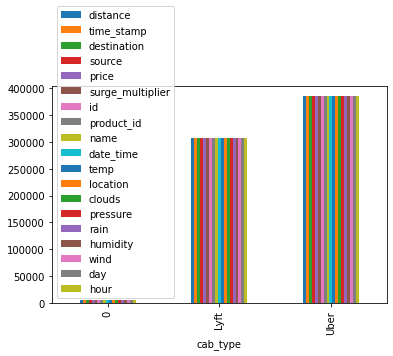

In [26]:
a.groupby('cab_type').count().plot.bar()

<AxesSubplot:>

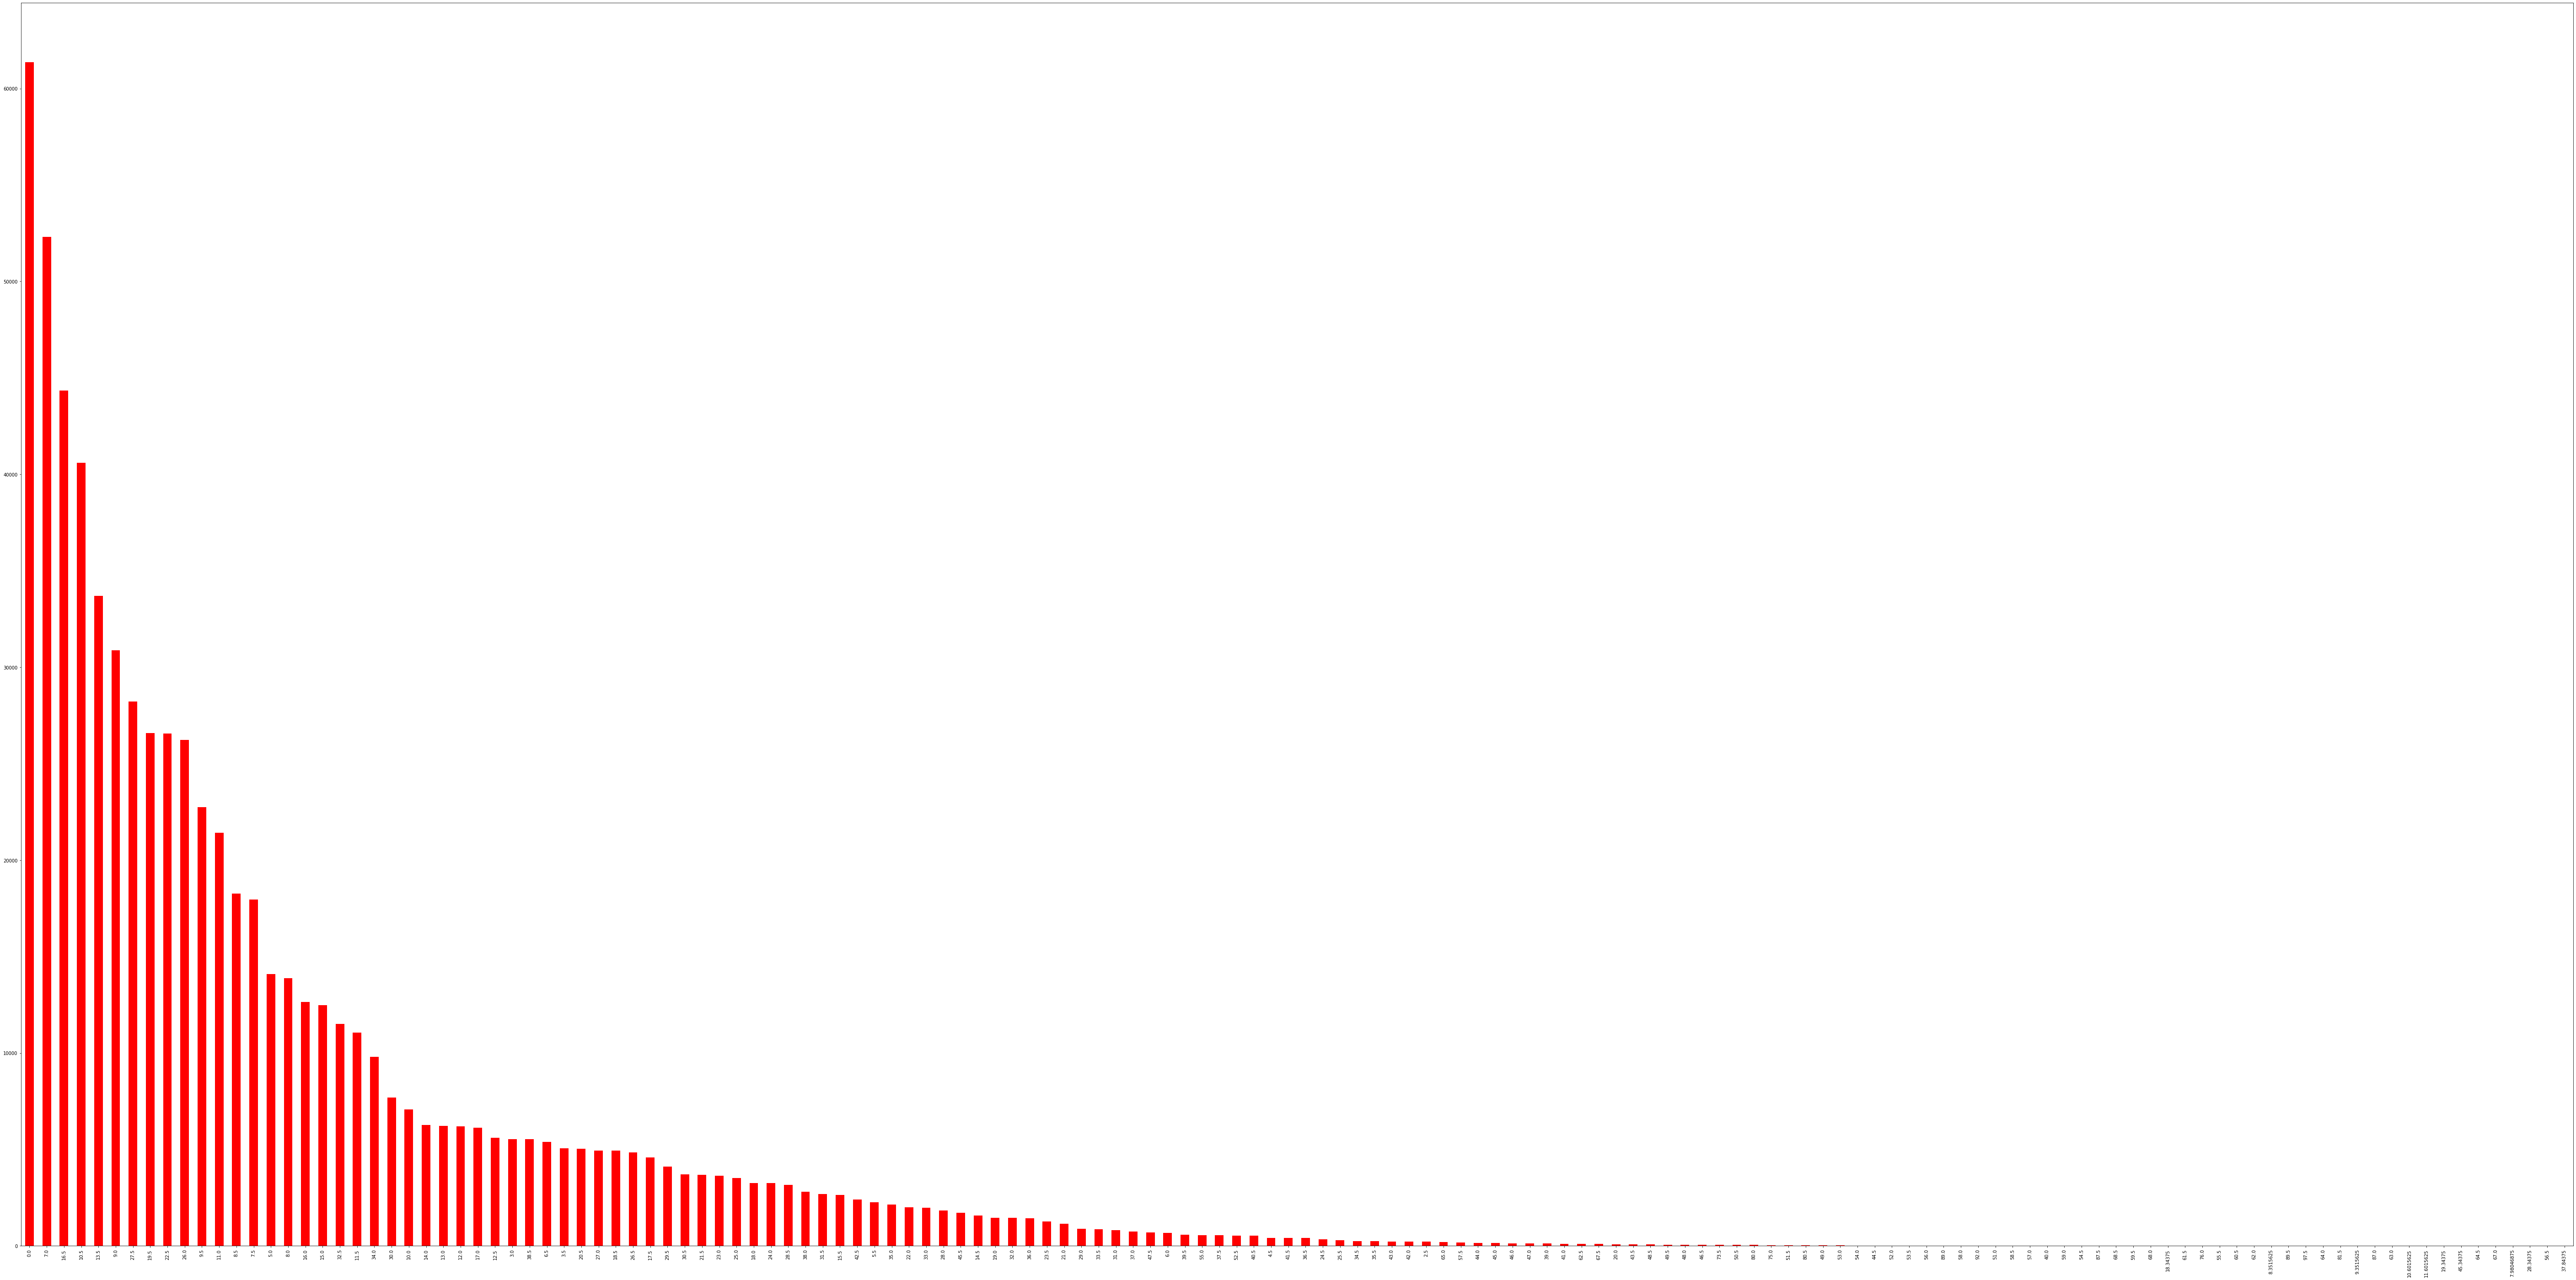

In [27]:
a.price.value_counts().plot(kind="bar",figsize=(100,50),color='red')

<AxesSubplot:>

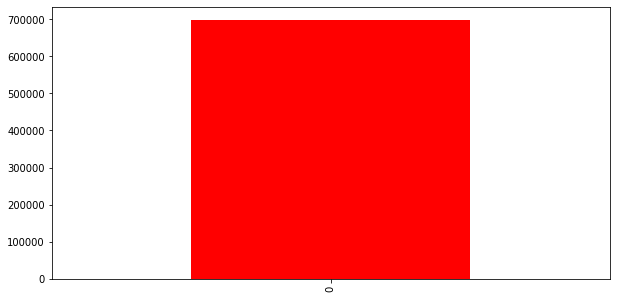

In [28]:
a.hour.value_counts().plot(kind="bar",figsize=(10,5),color='red')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


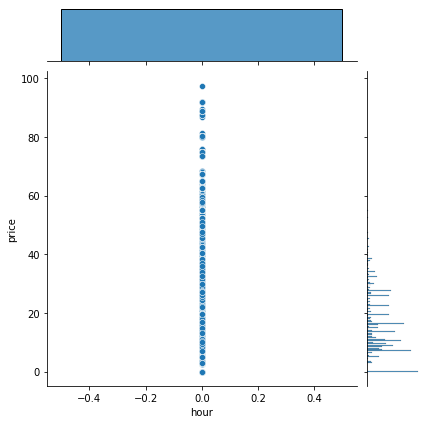

In [29]:
sns.jointplot(a.hour,a.price)

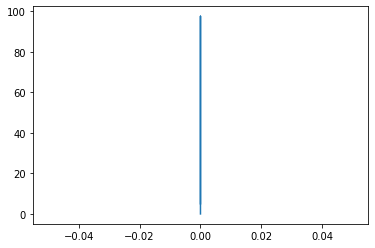

In [30]:
x=a.price
y=a.hour
plt.plot(y,x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


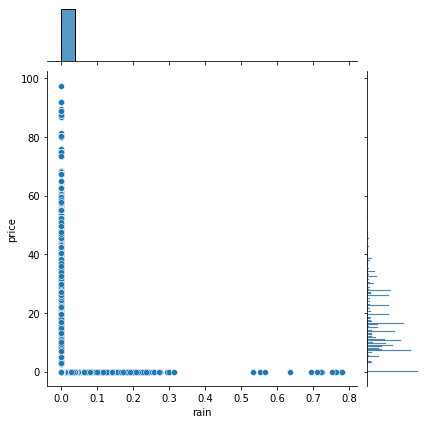

In [31]:
sns.jointplot(a.rain,a.price)

In [32]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [33]:
x1=a[(['distance', 'surge_multiplier', 'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day','hour'])]
y1=a[('price')]

train -test splitting

In [34]:
from sklearn.model_selection import train_test_split
x_train, y_train ,x_test, y_test = train_test_split(x1,y1,test_size=0.25,random_state =42)

importing the three main regressions for the pridiction

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [36]:
#model=RandomForestRegressor()
#model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(x_train,x_test)

DecisionTreeRegressor()

In [37]:
pred=model.predict(y_train)
print(pred)

[37.92857143 13.29355161 18.84351554 ... 11.56733484 12.01121346
 14.49097744]


In [38]:
df=pd.DataFrame({"actual": y_test, "prediction": pred})
df

,actual,prediction
81607,42.5,37.928571
354,0.0,13.293552
471801,32.5,18.843516
407645,27.5,11.827128
474760,27.5,10.657814
...,...,...
538489,7.5,11.021530
579511,13.5,16.118196
5421,9.0,11.567335
279982,8.0,12.011213


the error in predicition 

In [39]:
rsquare=model.score(x_train,x_test)
print (rsquare)

0.17928220072928847
